# Importing library

In [58]:
import pandas as pd
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing dataset 

In [3]:
exp_pm2_5 = pd.read_csv("/content/drive/MyDrive/Dataset for Final Assignment(Data and Society)/EXP_PM2_5_17112021145702320.csv")
death_total_air_population = pd.read_csv("/content/drive/MyDrive/Dataset for Final Assignment(Data and Society)/death-rates-total-air-pollution.csv")
industrial_production = pd.read_csv("/content/drive/MyDrive/Dataset for Final Assignment(Data and Society)/DP_LIVE_17112021151339668.csv")

# Preprocessing

In [4]:
death_total_air_population.rename(columns={"Deaths - Air pollution - Sex: Both - Age: Age-standardized (Rate)":"Deaths_rate", "Entity": "Country"},inplace = True)
industrial_production.rename(columns={"Value":"Value_of_industrial_production"},inplace = True)
exp_pm2_5.rename(columns={"Value":"Value_of_exp_pm2_5"},inplace=True)

In [5]:
country_list = list(industrial_production.LOCATION.unique()[:-1])
country_list.remove("EA19")
country_list.remove("JPN")
year_list = list(industrial_production.TIME.unique())

In [11]:
exp_pm2_5 = exp_pm2_5.loc[exp_pm2_5['COU'].isin(country_list)&exp_pm2_5['Year'].isin(year_list)][["COU","Country", "Year", "Value_of_exp_pm2_5"]]
exp_pm2_5.reset_index(drop=True, inplace=True)

In [12]:
death_total_air_population = death_total_air_population.loc[death_total_air_population['Code'].isin(country_list)&death_total_air_population['Year'].isin(year_list)][["Code","Country", "Year", "Deaths_rate"]]
death_total_air_population.reset_index(drop=True, inplace=True)


In [13]:
industrial_production = industrial_production.loc[industrial_production['LOCATION'].isin(country_list)&industrial_production['TIME'].isin(year_list)][["LOCATION","TIME", "Value_of_industrial_production"]]
industrial_production.reset_index(drop=True, inplace=True)

# Merging datasets

In [64]:
res_df = industrial_production.merge(death_total_air_population, how='inner', left_on=['LOCATION', 'TIME'], right_on=['Code', 'Year'])[["Country", "Year", "Code", "Value_of_industrial_production","Deaths_rate"]]
res_df = res_df.merge(exp_pm2_5, how='inner', left_on=['Code', 'Year'], right_on=['COU', 'Year'])[["Country_x", "Year", "Code", "Value_of_industrial_production","Deaths_rate", "Value_of_exp_pm2_5" ]]
res_df.rename(columns={"Country_x":"Country"}, inplace = True)

# Analyzing the entire the merged dataset

## Correlation Analysis

In [65]:
corr = res_df[["Value_of_industrial_production", "Deaths_rate", "Value_of_exp_pm2_5"]].corr()
corr.style.background_gradient(cmap='coolwarm')

,Value_of_industrial_production,Deaths_rate,Value_of_exp_pm2_5
Value_of_industrial_production,1.000000,-0.153003,-0.053766
Deaths_rate,-0.153003,1.000000,0.871095
Value_of_exp_pm2_5,-0.053766,0.871095,1.000000


## Regresion Anaylsis

In [68]:
reg = smf.ols('Deaths_rate ~ Value_of_industrial_production + Value_of_exp_pm2_5', data = res_df)
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Deaths_rate   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     544.4
Date:                Thu, 18 Nov 2021   Prob (F-statistic):          1.76e-104
Time:                        11:46:42   Log-Likelihood:                -1250.6
No. Observations:                 328   AIC:                             2507.
Df Residuals:                     325   BIC:                             2519.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

# Importing the new data set which is about renewable energy consumption

In [ ]:
renewable_energy_consumption = pd.read_csv("/content/drive/MyDrive/Dataset for Final Assignment(Data and Society)/Renewable energy consumption.csv")

In [69]:
column_names = ['Country_' , 'Code_', 'Year_', "valueof_renewable_energy_consumption"]
df_renew = pd.DataFrame(columns = column_names)

In [70]:
for country_code in country_list:
  row = renewable_energy_consumption[renewable_energy_consumption["Country Code"] == country_code]
  for year in year_list:
    df_renew = df_renew.append({"Country_": list(row["Country Name"])[0], "Code_":country_code, "Year_": year, "valueof_renewable_energy_consumption": list(row[str(year)])[0]}, ignore_index = True)

In [71]:
res_df = res_df.merge(df_renew, how='inner', left_on=['Code', 'Year'], right_on=['Code_', 'Year_'])[["Country", "Year", "Code", "Value_of_industrial_production","Deaths_rate", "Value_of_exp_pm2_5", "valueof_renewable_energy_consumption" ]]

# Analyzing the entire the merged dataset with the dataset renewable energy consumption

## Correlation Analysis

In [72]:
corr = res_df[["Value_of_industrial_production", "Deaths_rate", "Value_of_exp_pm2_5", "valueof_renewable_energy_consumption"]].corr()
corr.style.background_gradient(cmap='coolwarm')

,Value_of_industrial_production,Deaths_rate,Value_of_exp_pm2_5,valueof_renewable_energy_consumption
Value_of_industrial_production,1.000000,-0.153003,-0.053766,0.100498
Deaths_rate,-0.153003,1.000000,0.871095,-0.067673
Value_of_exp_pm2_5,-0.053766,0.871095,1.000000,-0.082837
valueof_renewable_energy_consumption,0.100498,-0.067673,-0.082837,1.000000


## Regression Analysis

In [74]:
reg = smf.ols('Deaths_rate ~ Value_of_industrial_production + Value_of_exp_pm2_5 + valueof_renewable_energy_consumption', data = res_df)
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Deaths_rate   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     362.2
Date:                Thu, 18 Nov 2021   Prob (F-statistic):          3.99e-103
Time:                        11:48:59   Log-Likelihood:                -1250.4
No. Observations:                 328   AIC:                             2509.
Df Residuals:                     324   BIC:                             2524.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


# Analyzing the merged dataset where year is equal to 2017

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [40, 10]

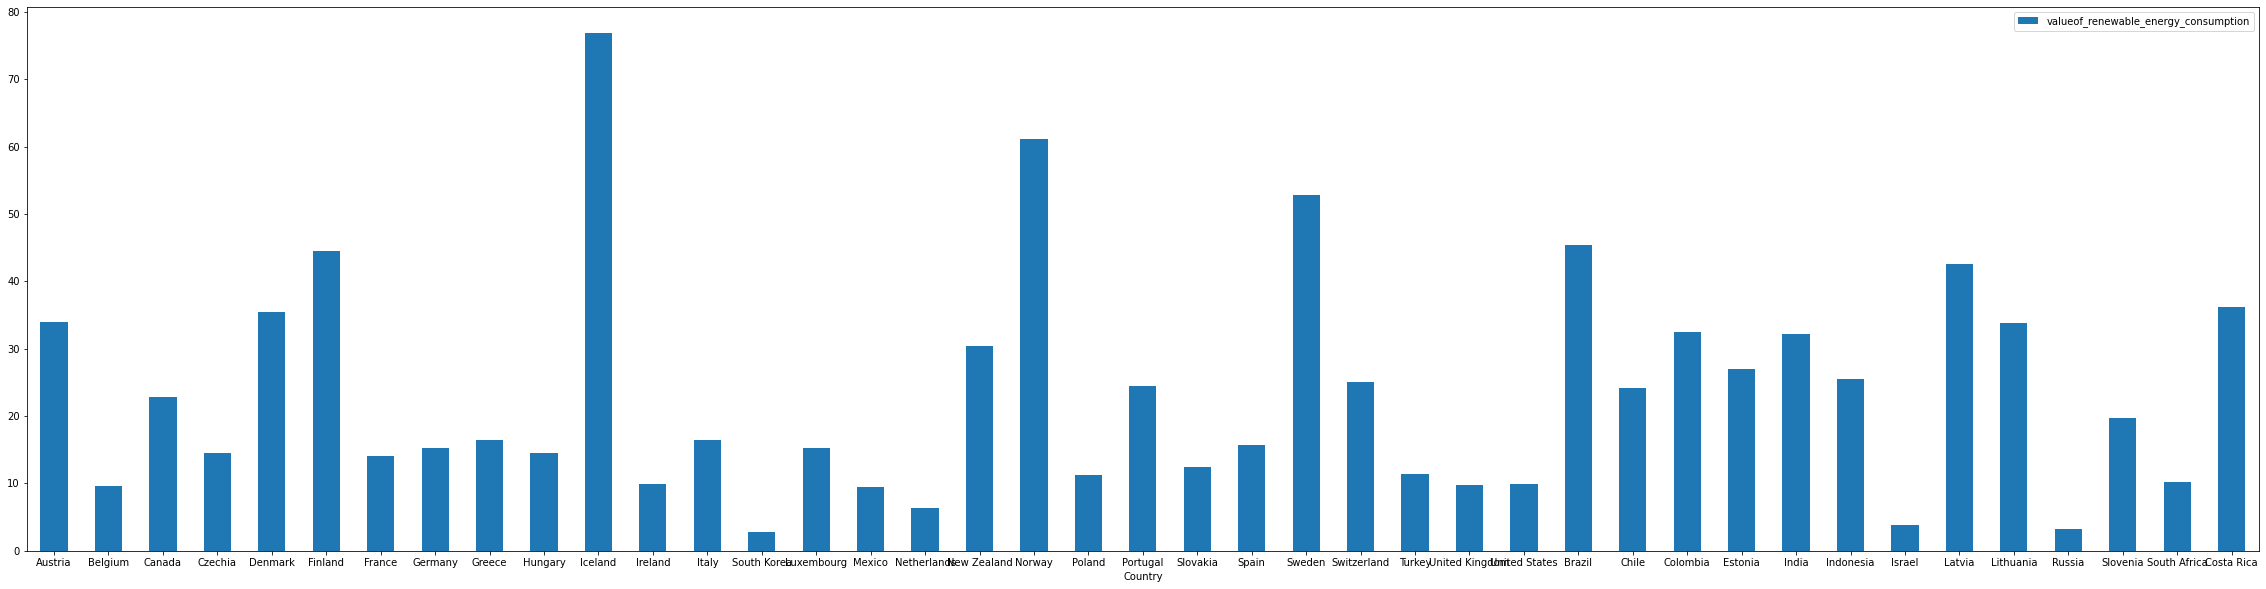

In [75]:
res_df.loc[res_df.Year ==2017].plot.bar(x='Country', y='valueof_renewable_energy_consumption', rot=0)

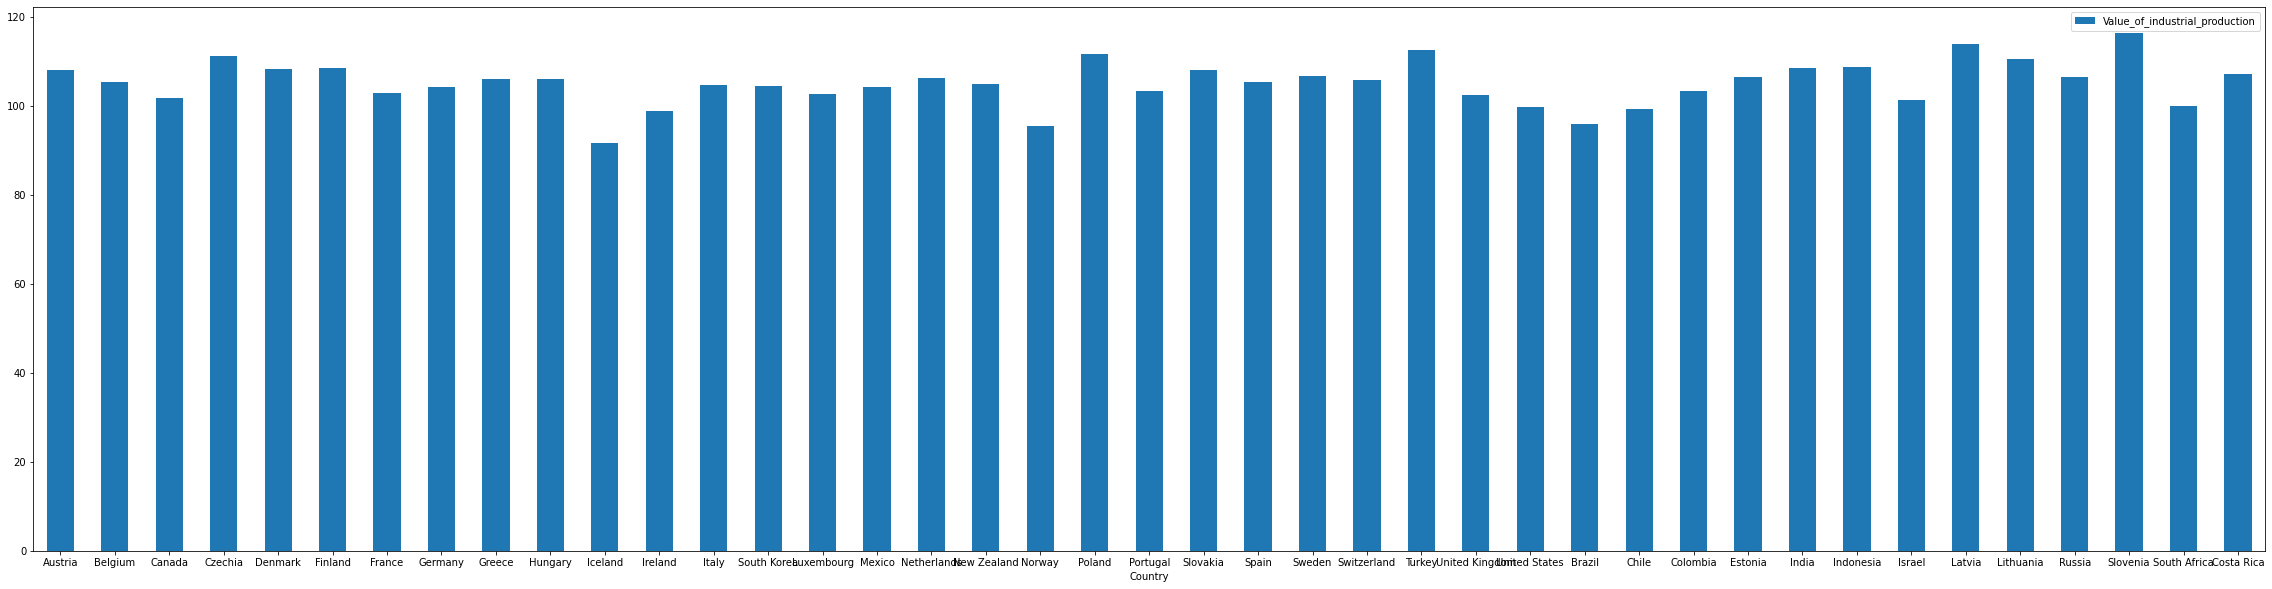

In [41]:
res_df.loc[res_df.Year ==2017].plot.bar(x='Country', y='Value_of_industrial_production', rot=0)

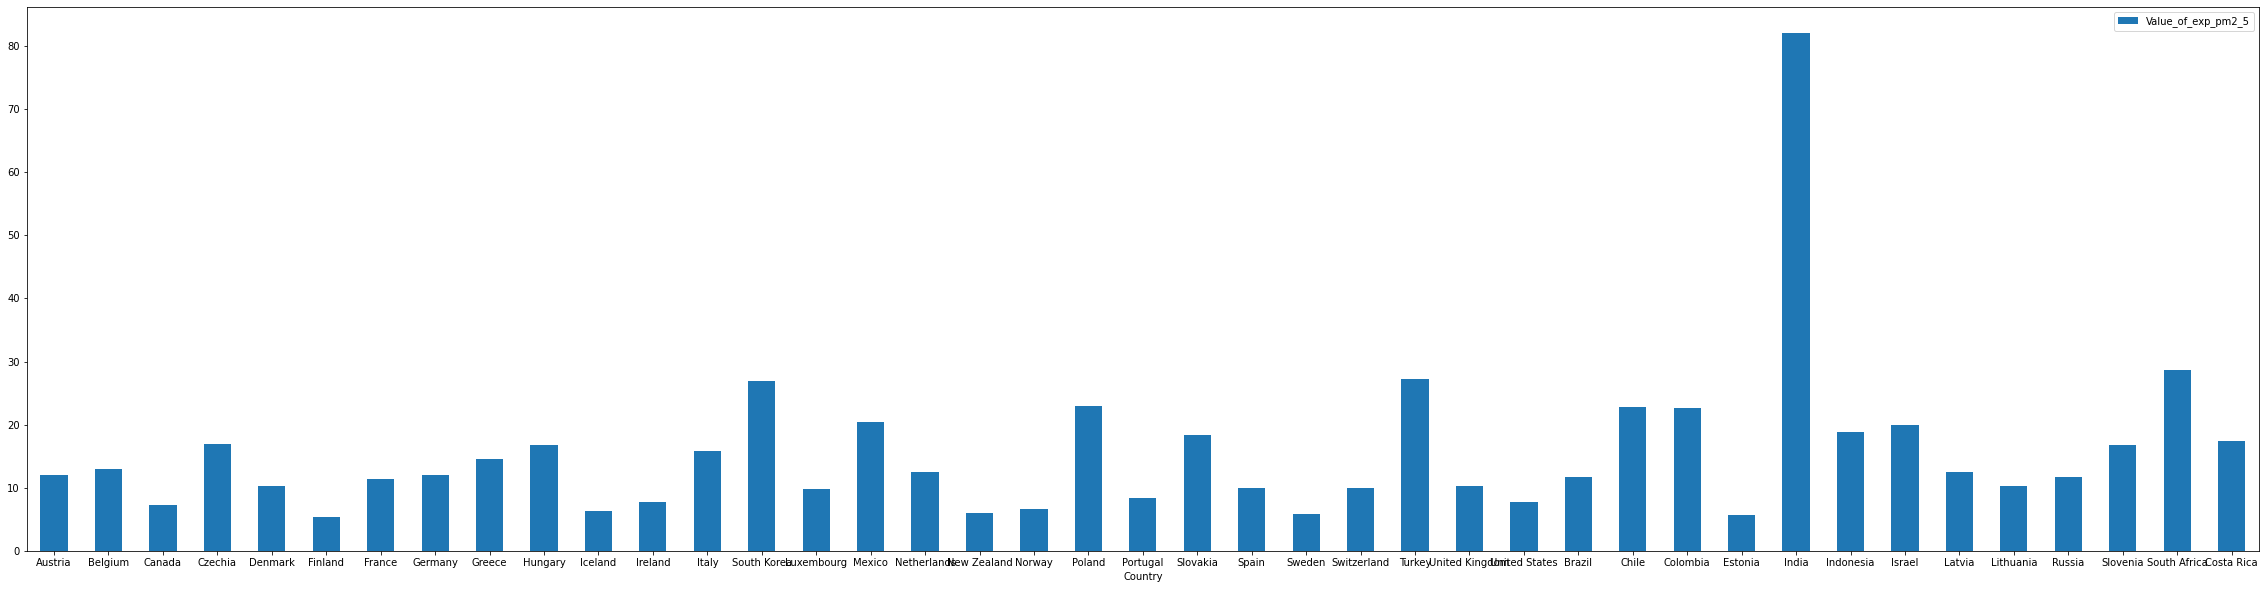

In [43]:
res_df.loc[res_df.Year ==2017].plot.bar(x='Country', y='Value_of_exp_pm2_5', rot=0 )

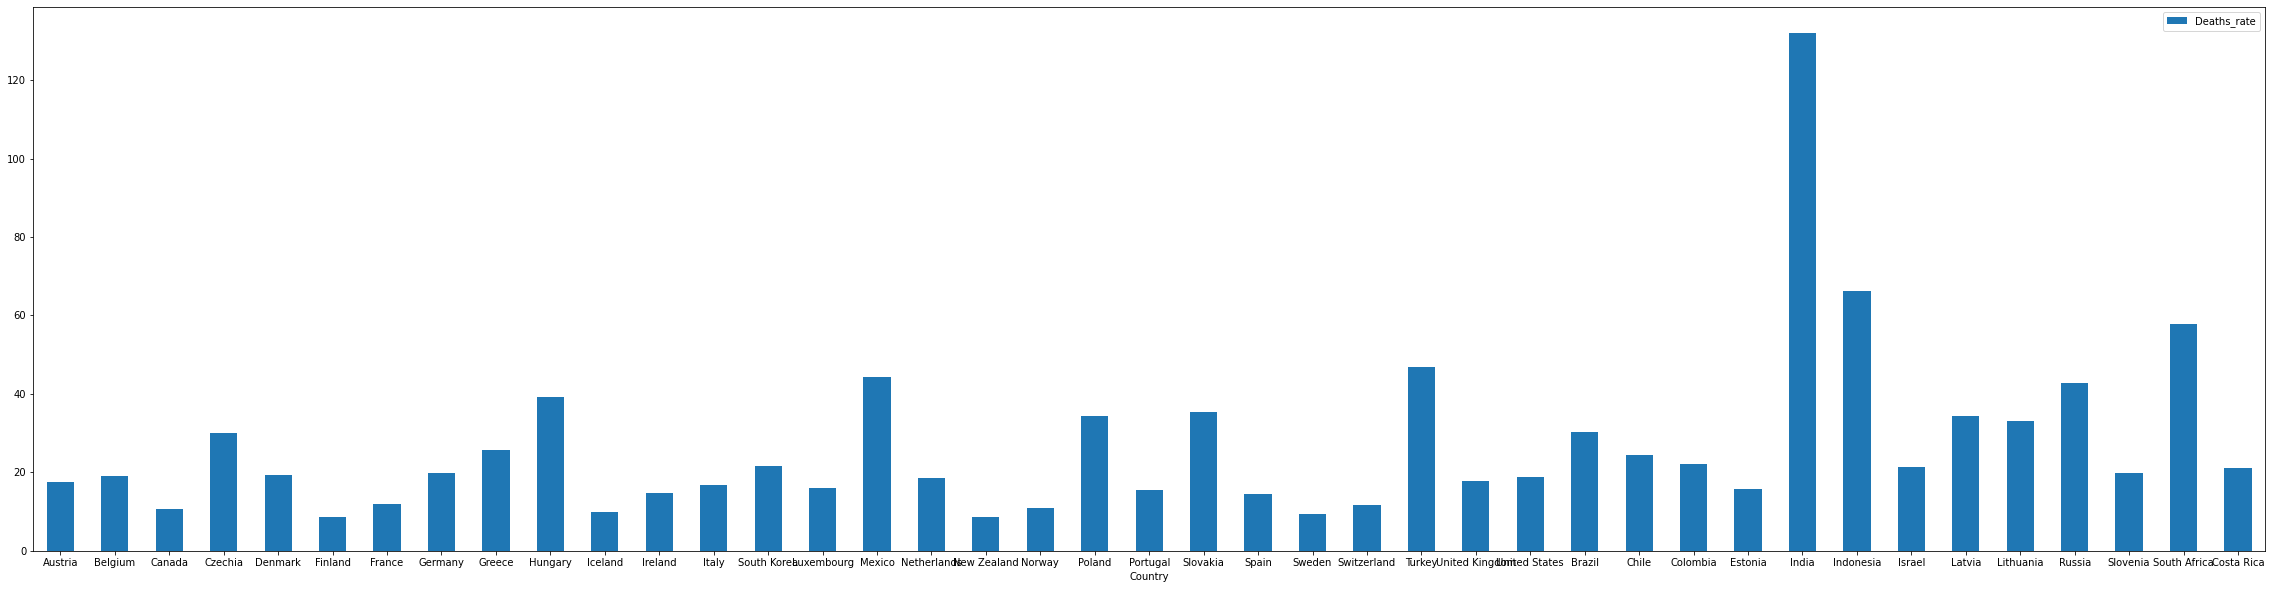

In [45]:
res_df.loc[res_df.Year ==2017].plot.bar(x='Country', y='Deaths_rate', rot=0 )

In [ ]:
res_df_2017 = res_df.loc[res_df.Year == 2017]

## Correlation Analysis

In [88]:
corr = res_df_2017[["Value_of_industrial_production", "Deaths_rate", "Value_of_exp_pm2_5", "valueof_renewable_energy_consumption"]].corr()
corr.style.background_gradient(cmap='coolwarm')

,Value_of_industrial_production,Deaths_rate,Value_of_exp_pm2_5,valueof_renewable_energy_consumption
Value_of_industrial_production,1.000000,0.260407,0.209529,-0.238583
Deaths_rate,0.260407,1.000000,0.882793,-0.127874
Value_of_exp_pm2_5,0.209529,0.882793,1.000000,-0.158208
valueof_renewable_energy_consumption,-0.238583,-0.127874,-0.158208,1.000000


## Regression Analysis

In [92]:
reg = smf.ols('Deaths_rate ~ Value_of_industrial_production + Value_of_exp_pm2_5 + valueof_renewable_energy_consumption', data = res_df_2017)
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Deaths_rate   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     45.33
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           1.79e-12
Time:                        11:54:28   Log-Likelihood:                -151.92
No. Observations:                  41   AIC:                             311.8
Df Residuals:                      37   BIC:                             318.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


# Analyzing the merged dataset where year is equal to 2010

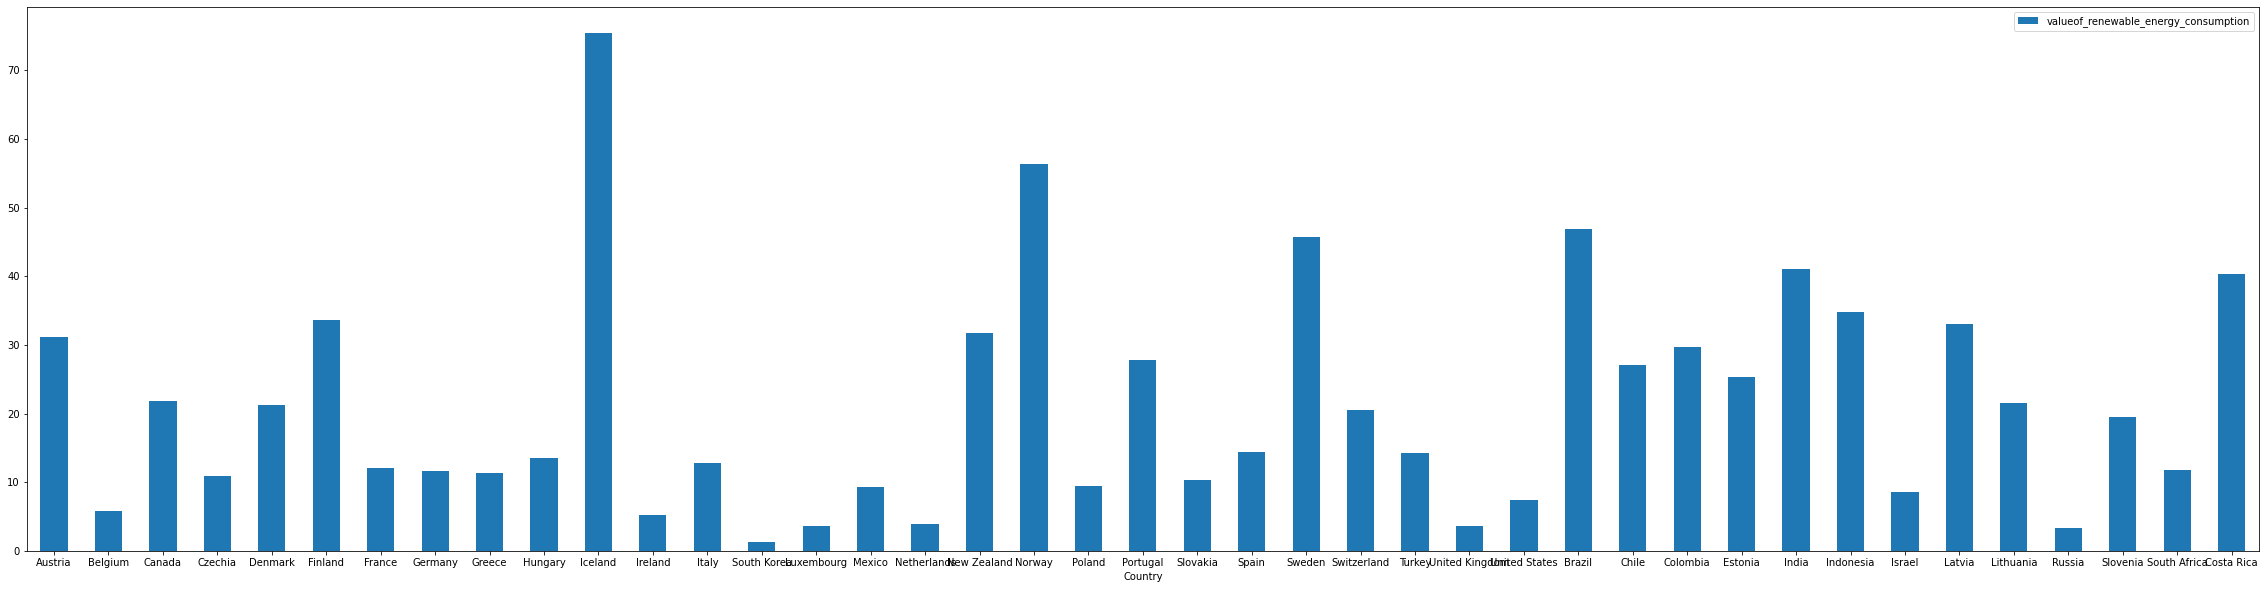

In [76]:
res_df.loc[res_df.Year ==2010].plot.bar(x='Country', y='valueof_renewable_energy_consumption', rot=0)

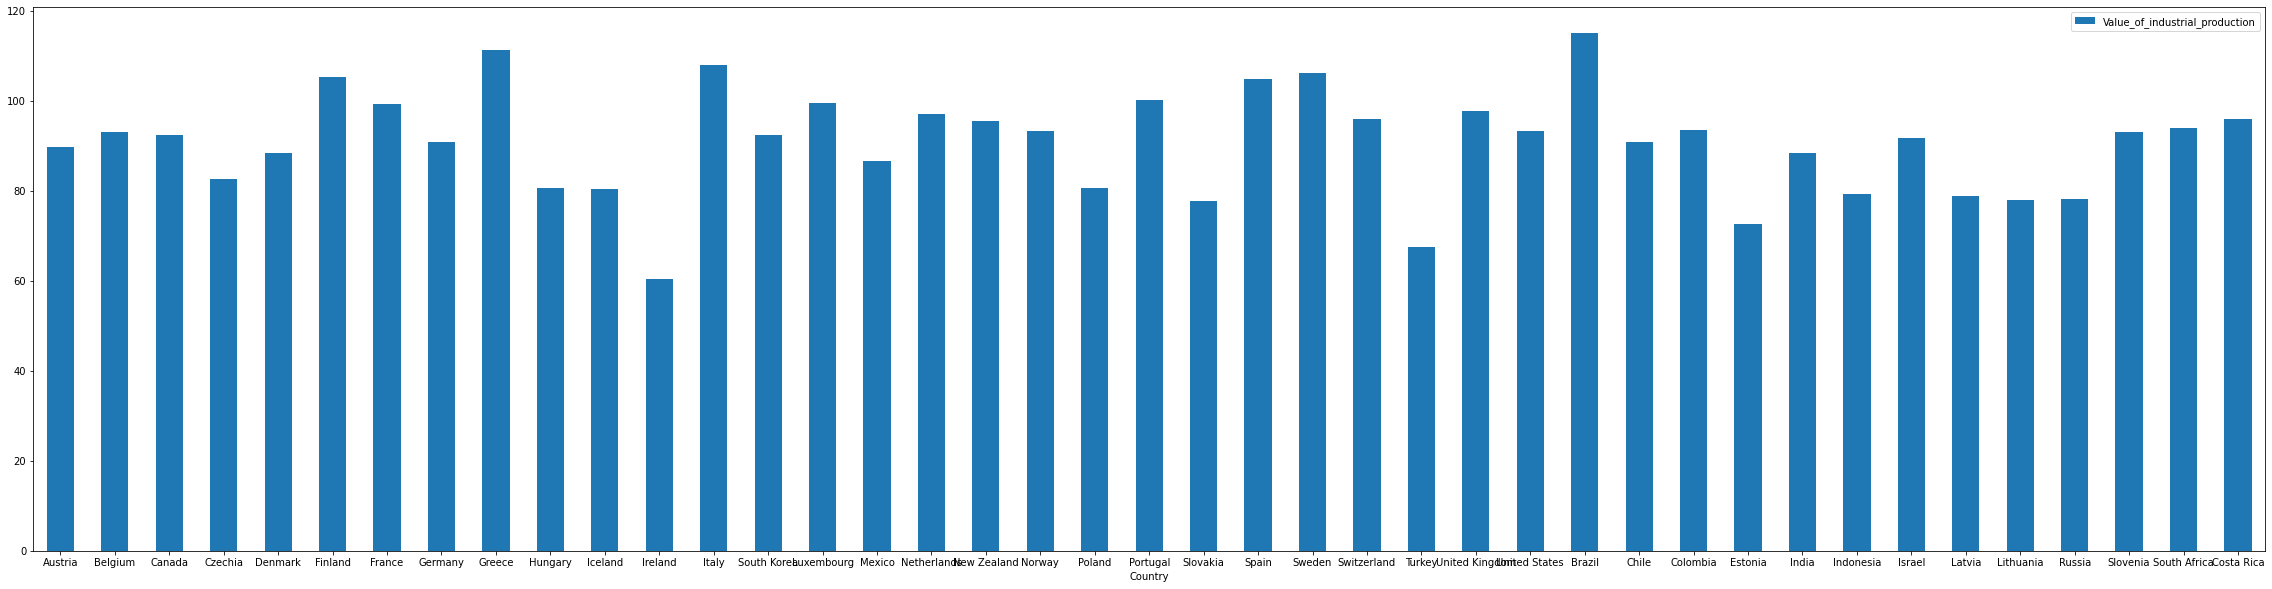

In [42]:
res_df.loc[res_df.Year ==2010].plot.bar(x='Country', y='Value_of_industrial_production', rot=0)

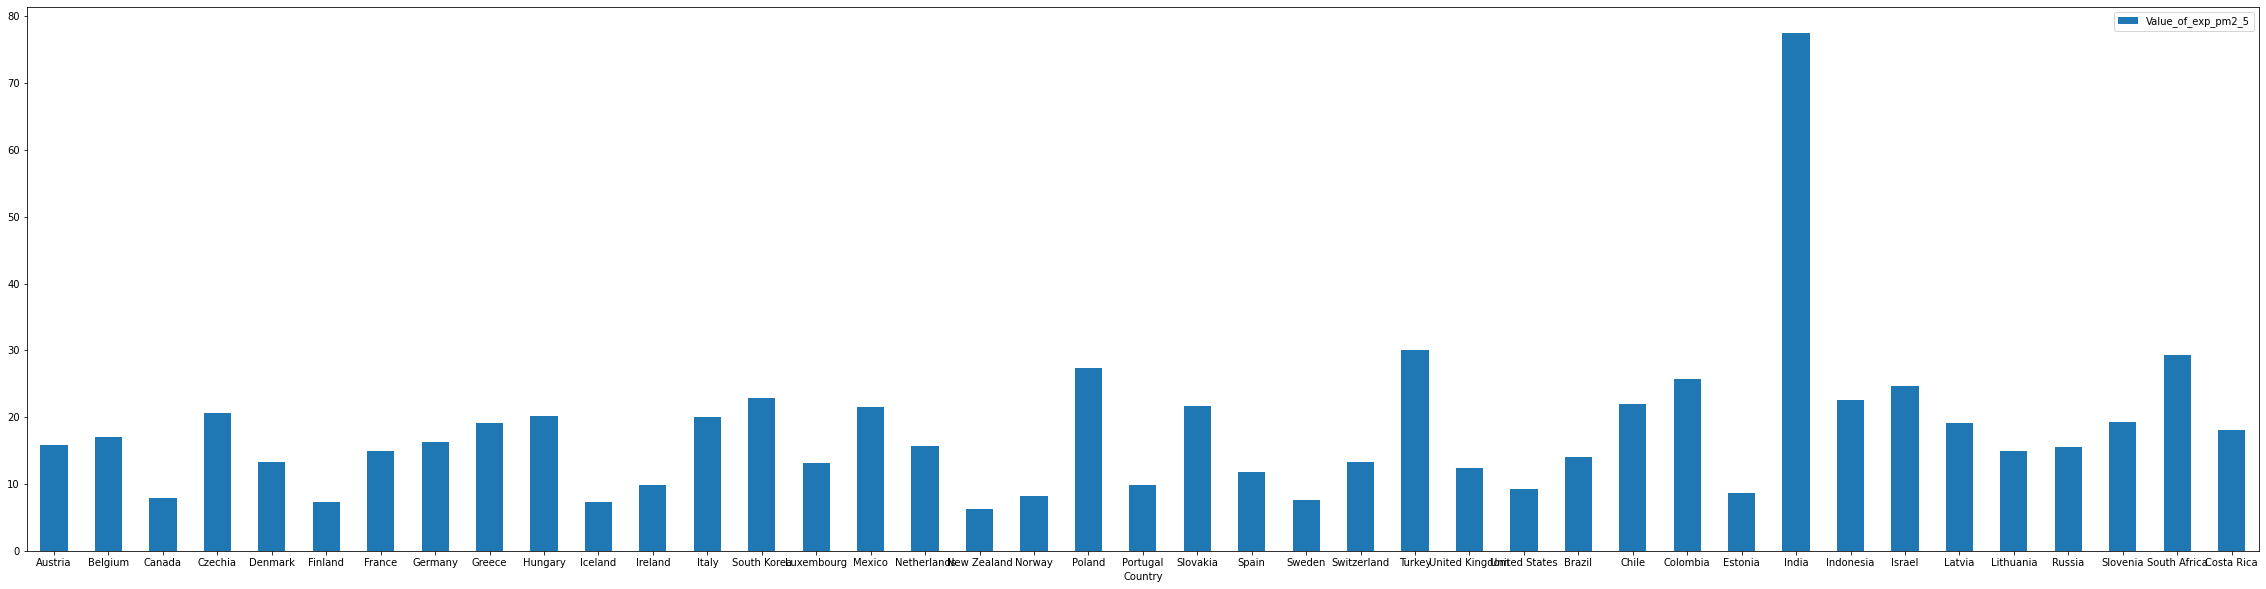

In [44]:
res_df.loc[res_df.Year ==2010].plot.bar(x='Country', y='Value_of_exp_pm2_5', rot=0 )

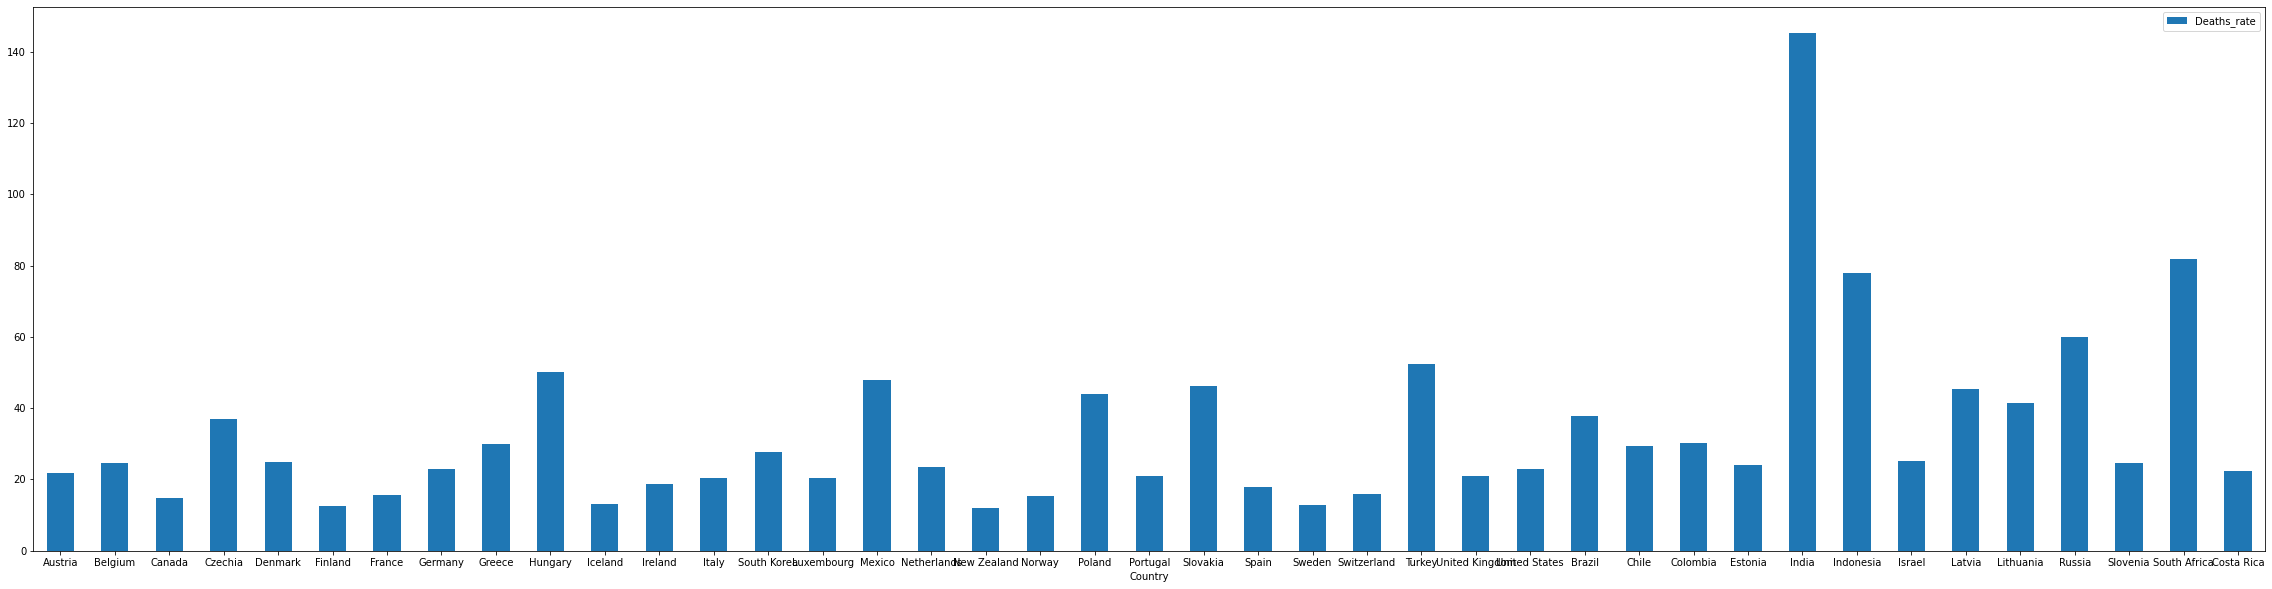

In [46]:
res_df.loc[res_df.Year ==2010].plot.bar(x='Country', y='Deaths_rate', rot=0 )

In [87]:
res_df_2010 = res_df.loc[res_df.Year == 2010]

## Correlation Analysis

In [86]:
corr = res_df_2010[["Value_of_industrial_production", "Deaths_rate", "Value_of_exp_pm2_5", "valueof_renewable_energy_consumption"]].corr()
corr.style.background_gradient(cmap='coolwarm')

,Value_of_industrial_production,Deaths_rate,Value_of_exp_pm2_5,valueof_renewable_energy_consumption
Value_of_industrial_production,1.000000,-0.289123,-0.146765,0.106628
Deaths_rate,-0.289123,1.000000,0.867184,0.004715
Value_of_exp_pm2_5,-0.146765,0.867184,1.000000,-0.043213
valueof_renewable_energy_consumption,0.106628,0.004715,-0.043213,1.000000


## Regression Analysis

In [91]:
reg = smf.ols('Deaths_rate ~ Value_of_industrial_production + Value_of_exp_pm2_5 + valueof_renewable_energy_consumption', data = res_df_2010)
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Deaths_rate   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     44.31
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           2.49e-12
Time:                        11:54:23   Log-Likelihood:                -157.55
No. Observations:                  41   AIC:                             323.1
Df Residuals:                      37   BIC:                             330.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


# Regression Analysis for renewable energy consumption and industrial production

In [105]:
reg = smf.ols('valueof_renewable_energy_consumption ~ Value_of_industrial_production', data = res_df)
res = reg.fit()
print(res.summary())

                                     OLS Regression Results                                     
Dep. Variable:     valueof_renewable_energy_consumption   R-squared:                       0.010
Model:                                              OLS   Adj. R-squared:                  0.007
Method:                                   Least Squares   F-statistic:                     3.326
Date:                                  Thu, 18 Nov 2021   Prob (F-statistic):             0.0691
Time:                                          12:00:14   Log-Likelihood:                -1374.4
No. Observations:                                   328   AIC:                             2753.
Df Residuals:                                       326   BIC:                             2760.
Df Model:                                             1                                         
Covariance Type:                              nonrobust                                         
                              